# Review Yelp Review

**The purpose of this project is to determine if people leaving a review have a positive or negative experience with the associated business**

This is useful for the business because the model could be applied to social media review and a determin if the outcome of the message is positive or negative.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the files from kaggle.

In [3]:
df = pd.read_csv('Z:\Learning and Development\Data Science\Projects\Yelp Review NLP\yelp.csv')

In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
# To determine if the review is positive or negative im going to split the review by their ratings. x >= 3 is positive. 

In [8]:
# 0 is negative and 1 is positive.

In [9]:
df['stars'] = df['stars'].apply(lambda x: 0 if x < 3 else 1)

In [10]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,1,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,1,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,1,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,1,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [11]:
# How many different types of 'type' are there?

In [12]:
df['type'].nunique()

1

In [13]:
# Creating a df with just the stars and text.
# Change stars to outlook

In [14]:
df_yelp = df[['stars','text']]
df_yelp.columns = ['outlook','text']

In [15]:
df_yelp.head()

,outlook,text
0,1,My wife took me here on my birthday for breakf...
1,1,I have no idea why some people give bad review...
2,1,love the gyro plate. Rice is so good and I als...
3,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,1,General Manager Scott Petello is a good egg!!!...


In [16]:
# add a column for the length of text, perhaps theres a correlation between good reviews and text length

In [17]:
df_yelp['text length'] = df_yelp['text'].apply(len)

<ipython-input-17-e0003e8d3ccd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yelp['text length'] = df_yelp['text'].apply(len)


In [18]:
df_yelp.head()

,outlook,text,text length
0,1,My wife took me here on my birthday for breakf...,889
1,1,I have no idea why some people give bad review...,1345
2,1,love the gyro plate. Rice is so good and I als...,76
3,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,1,General Manager Scott Petello is a good egg!!!...,469


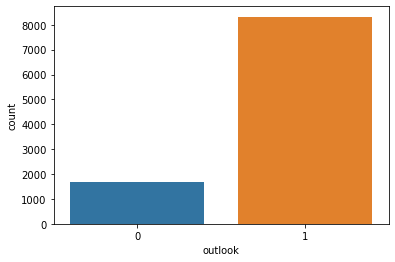

In [19]:
sns.countplot(x='outlook',data=df_yelp)

In [20]:
# There are far more positive reviews than negitive ones. Could create strong bias in training for positive reviews.

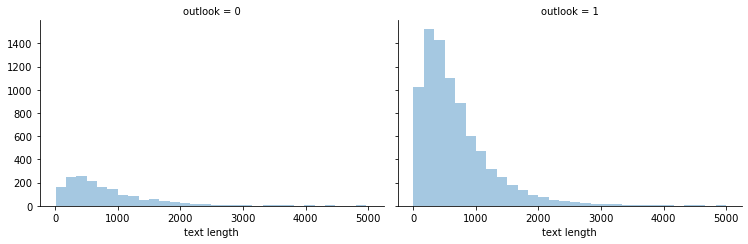

In [21]:
g = sns.FacetGrid(df_yelp, col="outlook", height=3.5, aspect=1.5)
g.map(sns.distplot, "text length", kde=False, bins = 30)

In [22]:
# the plots show that both have similar distributions with the mode around 300 words per review.

In [23]:
# Plot word clouds for negative and positive reviews

In [24]:
from wordcloud import WordCloud

In [25]:
positive = df_yelp[df_yelp['outlook'] == 1]['text']
negative = df_yelp[df_yelp['outlook'] == 0]['text']

text_pos = ''.join(i for i in positive)
text_neg = ''.join(i for i in negative)

(-0.5, 399.5, 199.5, -0.5)

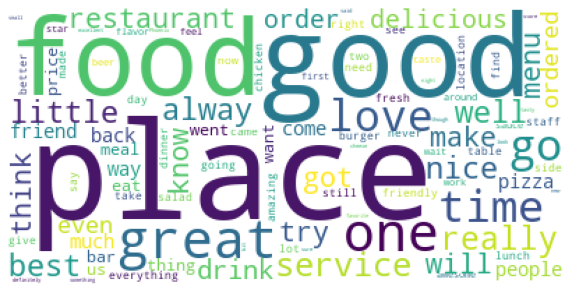

In [26]:
WC_pos = WordCloud(background_color='white', max_words=100)
WC_pos.generate(text_pos)

plt.figure(figsize=(10,10))
plt.imshow(WC_pos)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

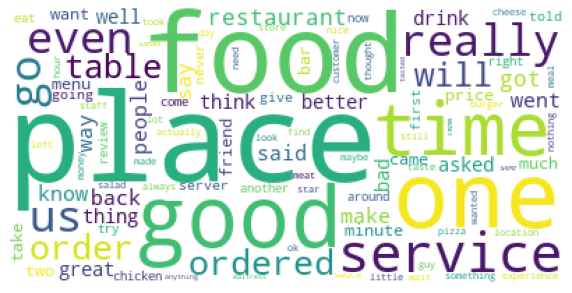

In [27]:
WC_neg = WordCloud(background_color='white', max_words=100)
WC_neg.generate(text_neg)

plt.figure(figsize=(10,10))
plt.imshow(WC_neg)
plt.axis('off')

# Machine Learning Section

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [29]:
X = df_yelp['text']
y = df_yelp['outlook']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [30]:
# Create pipeline for naive bayes classification

In [31]:
pipeline_NB = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [32]:
pipeline_NB.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [33]:
pred_NB = pipeline_NB.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print(confusion_matrix(y_test,pred_NB))
print(classification_report(y_test,pred_NB))

[[ 226  297]
 [  85 2392]]
              precision    recall  f1-score   support

           0       0.73      0.43      0.54       523
           1       0.89      0.97      0.93      2477

    accuracy                           0.87      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.86      0.87      0.86      3000



In [36]:
# 87% accurate, not bad.

In [37]:
# test my random review

In [38]:
test = ['Terrible, absolutely terrible...']
print(pipeline_NB.predict(test))

[0]


In [39]:
# good, the multinomical naive bayes predicted my review well! 
# However the predictions of the negitive reviews is not great, with only 54% accuracy

## Try the same ML but using cleaning the text

In [40]:
# remove all the stop words and punctuation.

In [41]:
import string
from nltk.corpus import stopwords

In [42]:
def clean_text(text):
    # remove punctuation
    text = [i for i in text if i not in string.punctuation]
    # rejoin string
    text = ''.join(text)
    # remove stop words and return cleaned string
    return [i for i in text.split() if i.lower() not in stopwords.words('english')]

In [43]:
pipeline_NB_clean = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('classifier', MultinomialNB())
])

In [44]:
pipeline_NB_clean.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x00000188DD2CA040>)),
                ('classifier', MultinomialNB())])

In [45]:
pred_NB_clean = pipeline_NB_clean.predict(X_test)

In [46]:
print(confusion_matrix(y_test, pred_NB_clean))
print(classification_report(y_test, pred_NB_clean))

[[ 174  349]
 [  38 2439]]
              precision    recall  f1-score   support

           0       0.82      0.33      0.47       523
           1       0.87      0.98      0.93      2477

    accuracy                           0.87      3000
   macro avg       0.85      0.66      0.70      3000
weighted avg       0.87      0.87      0.85      3000



In [47]:
# The accuracy is the same for both, but this second method is slightly worse at predicting negative reviews.

# Try using TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
pipeline_NB_clean_TFIDF = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [50]:
pipeline_NB_clean_TFIDF.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x00000188DD2CA040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [51]:
pred_NB_clean_TFIDF = pipeline_NB_clean_TFIDF.predict(X_test)

In [52]:
print(confusion_matrix(y_test, pred_NB_clean_TFIDF))
print(classification_report(y_test, pred_NB_clean_TFIDF))

[[   0  523]
 [   0 2477]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       523
           1       0.83      1.00      0.90      2477

    accuracy                           0.83      3000
   macro avg       0.41      0.50      0.45      3000
weighted avg       0.68      0.83      0.75      3000



C:\Users\UKGC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# interestingly using tf-idf made the predictions worse
# it was unable to predict any negitive reviews correctly

# SMOTE

I will now try and use SMOTE to create an even amount of negative and positive reviews in the original df. I'm using this method to try and improve the accuracy of predictions of negitive reviews as these currently has a poor accutacy. A balance of classes will allow for better predictions of negative reviews as this class is small in my df.

Instead of making duplicates of existing negative reviews SMOTE will synthesize new examples from the minority class

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
# need to vectorize the training data.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
Vec = TfidfVectorizer().fit(X_train)

X_trainV = Vec.transform(X_train)
X_testV = Vec.transform(X_test)

sm = SMOTE(random_state=1)
X_bal, y_bal = sm.fit_resample(X_trainV, y_train)

In [61]:
NB = MultinomialNB()
NB.fit(X_bal, y_bal)

MultinomialNB()

In [62]:
pred_NB = NB.predict(X_testV)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
print(confusion_matrix(y_test,pred_NB))
print(classification_report(y_test,pred_NB))

[[ 426   97]
 [ 478 1999]]
              precision    recall  f1-score   support

           0       0.47      0.81      0.60       523
           1       0.95      0.81      0.87      2477

    accuracy                           0.81      3000
   macro avg       0.71      0.81      0.74      3000
weighted avg       0.87      0.81      0.83      3000



In [65]:
# good increase in accuracy of the negative reviews.
# small decrease in the accuracy of the postivie reviews.

# Try a logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lm = LogisticRegression(max_iter=10000)

In [68]:
lm.fit(X_bal, y_bal)

LogisticRegression(max_iter=10000)

In [69]:
pred_lm = lm.predict(X_testV)

In [70]:
print(confusion_matrix(y_test,pred_lm))
print(classification_report(y_test,pred_lm))

[[ 357  166]
 [ 208 2269]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       523
           1       0.93      0.92      0.92      2477

    accuracy                           0.88      3000
   macro avg       0.78      0.80      0.79      3000
weighted avg       0.88      0.88      0.88      3000



In [71]:
# try grid search to increase accuracy.

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'C':[0.1,1,10,100]}

In [74]:
grid = GridSearchCV(lm, param_grid, verbose=2)

In [75]:
grid.fit(X_bal, y_bal)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=0.1, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................................ C=0.1, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.2s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.3s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.4s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.3s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.2s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.2s finished


GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=2)

In [76]:
grid.best_params_

{'C': 100}

In [77]:
lm = LogisticRegression(C= 100, penalty= 'l2', max_iter=10000)

In [78]:
lm.fit(X_bal, y_bal)

LogisticRegression(C=100, max_iter=10000)

In [79]:
pred_lm = lm.predict(X_testV)

In [80]:
print(confusion_matrix(y_test,pred_lm))
print(classification_report(y_test,pred_lm))

[[ 332  191]
 [ 148 2329]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       523
           1       0.92      0.94      0.93      2477

    accuracy                           0.89      3000
   macro avg       0.81      0.79      0.80      3000
weighted avg       0.88      0.89      0.89      3000



In [81]:
# slight improvement in positive results. but possible over training as C is very high.

In [142]:
error = []
lis = np.arange(1,50,1)

for i in lis:
    lm = LogisticRegression(C= i, max_iter=10000)
    lm.fit(X_bal, y_bal)
    pred_lm = lm.predict(X_testV)
    error.append(np.mean(pred_lm != y_test))

Text(0, 0.5, 'Error Rate')

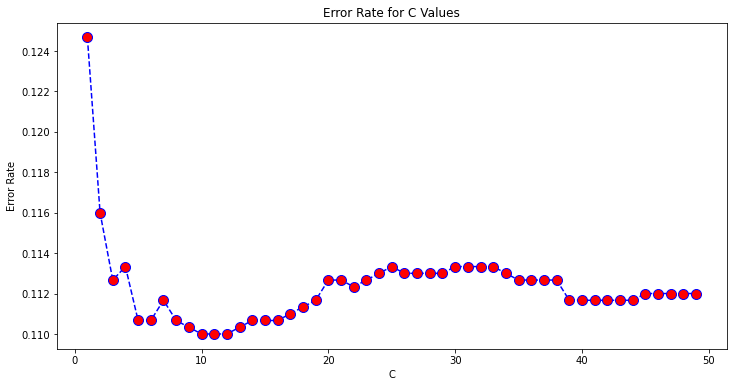

In [143]:
plt.figure(figsize=(12,6))
plt.plot(lis,error,color='blue',marker='o',linestyle='dashed',markerfacecolor ='red', markersize=10)
plt.title('Error Rate for C Values')
plt.xlabel('C')
plt.ylabel('Error Rate')

In [84]:
# note how this shows overall error is at a max when C = 10-12
# but we are more concerned with reducing error in the negative messages.

In [85]:
# error in negative reviews is found from comparning 0 - 0, 0 - 1 in our predicted to actual.

In [153]:
percent_correct_0 = []
pred_0 = []
y_test_0 = []
lis_0 = np.arange(1,50,1)

# loops through possible values of C in the logistic regression.
for i in lis_0:
    lm = LogisticRegression(C= i, max_iter=10000)
    lm.fit(X_bal, y_bal)
    pred_lm = lm.predict(X_testV)
    
    # creates a list of only the negitively predicted reviews and a list of the actual reviews.
    for i_idx, i in enumerate(pred_lm):
        if pred_lm[i_idx] == 0:
            pred_0.append(pred_lm[i_idx])
            y_test_0.append(list(y_test)[i_idx])
            
    correct = 0
    
    # compares these two lists and returns the accuracy of negatively predicted messages.
    for j_idx, j in enumerate(pred_0):
        if pred_0[j_idx] == y_test_0[j_idx]:
            correct += 1
    
    percent_correct_0.append(correct/j_idx)

Text(0, 0.5, '% accuracy')

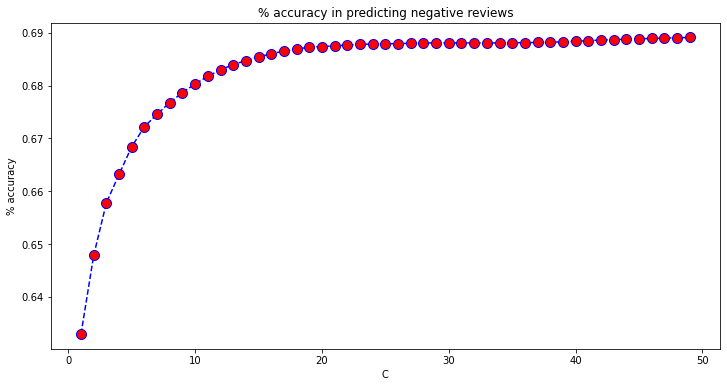

In [154]:
plt.figure(figsize=(12,6))
plt.plot(lis_0,percent_correct_0,color='blue',marker='o',linestyle='dashed',markerfacecolor ='red', markersize=10)
plt.title('% accuracy in predicting negative reviews')
plt.xlabel('C')
plt.ylabel('% accuracy')

In [144]:
# interestingly when increasing the value of C the accuracy of predicting
# negative reviews increase to an asymtopic value around 69%.

**The final model will use a logistic regression with a C value of 12. This value of 12 gives a minimum over all error and takes advatage of the majority of the upward trend for the negative reviews.**

In [155]:
lm = LogisticRegression(C= 12, max_iter=10000)
lm.fit(X_bal, y_bal)
pred_lm = lm.predict(X_testV)
print(confusion_matrix(y_test,pred_lm))
print(classification_report(y_test,pred_lm))

[[ 341  182]
 [ 148 2329]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       523
           1       0.93      0.94      0.93      2477

    accuracy                           0.89      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.89      0.89      0.89      3000



In [156]:
# this method increase the f1 score of the negative reviews by 1%.

# Testing

In [162]:
my_review_0 = ['What a lovely place to eat, the only problem was the long waiting time. Would not recommend!']
my_review_0 = Vec.transform(my_review_0)
print(lm.predict(my_review_0))

[0]


In [161]:
# correct!

In [164]:
my_review_1 = ['The food was incredible, the staff responsive and friendly']
my_review_1 = Vec.transform(my_review_1)
print(lm.predict(my_review_1))

[1]


In [165]:
# correct!

In [166]:
my_review_2 = ['Used to be good, but prices are getting quite high and service consistently poor in the shop. Restaurant food is good, but low rent environment. White garden plastic tables and chairs all around.']
my_review_2 = Vec.transform(my_review_2)
print(lm.predict(my_review_2))

[0]


In [167]:
# correct!

In [180]:
my_review_3 = ['Great visit, the food was really good, especially the korean chicken. wish they excepted cash though, getting money out was a bit of a pain']
my_review_3 = Vec.transform(my_review_3)
print(lm.predict(my_review_3))

[1]


In [179]:
# correct!